# Medical Cost Prediction: Data Exploration and Preprocessing

In this notebook, we'll explore the Medical Cost Personal Dataset to understand the relationships between various personal characteristics and medical costs. Our goal is to prepare the data for building a predictive model.

We'll follow these steps: 
1. Load and examine the data
2. Clean and preprocess the dataset 
3. Perform exploratory data analysis 
4. Prepare the data for modeling

## 1. Setting Up Our Environment

First, let's import the libraries we'll need for our analysis.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette('husl')

In [4]:
# Display all columns
pd.set_option('display.max_columns', None)

## 2. Loading and Examining the Data

Let's load our dataset and take an initial look at its structure.

In [5]:
# Load the dataset"
df = pd.read_csv('../data/raw_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (1338, 7)


In [6]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Display first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Data Quality Check

Let's check for missing values and examine the basic statistics of our numerical columns.

In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
# Display basic statistics
print("Basic statistics of numerical columns:")
df.describe()

Basic statistics of numerical columns:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 4. Exploratory Data Analysis

Let's visualize our data to better understand the relationships between variables.

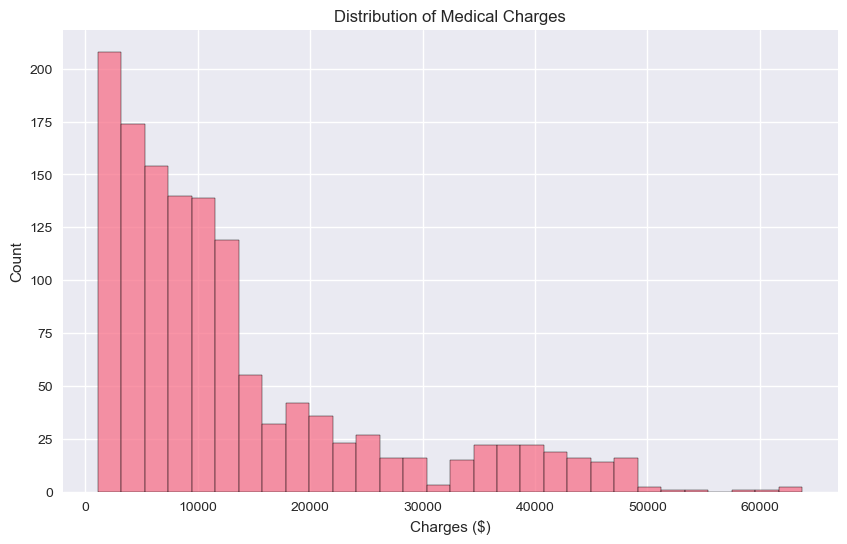

In [10]:
# Distribution of medical charges
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', bins=30)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Count')
plt.show()

In [11]:
# Calculate and print some statistics about charges
print("Charges Statistics:")
print(f"Mean charge: ${df['charges'].mean():,.2f}")
print(f"Median charge: ${df['charges'].median():,.2f}")
print(f"Standard deviation: ${df['charges'].std():,.2f}")

Charges Statistics:
Mean charge: $13,270.42
Median charge: $9,382.03
Standard deviation: $12,110.01


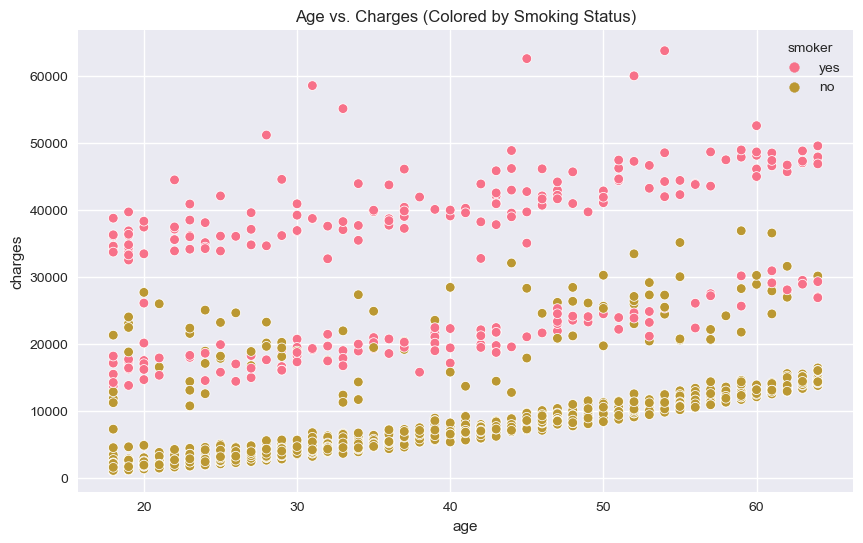

In [12]:
# Age vs. Charges relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs. Charges (Colored by Smoking Status)')
plt.show()

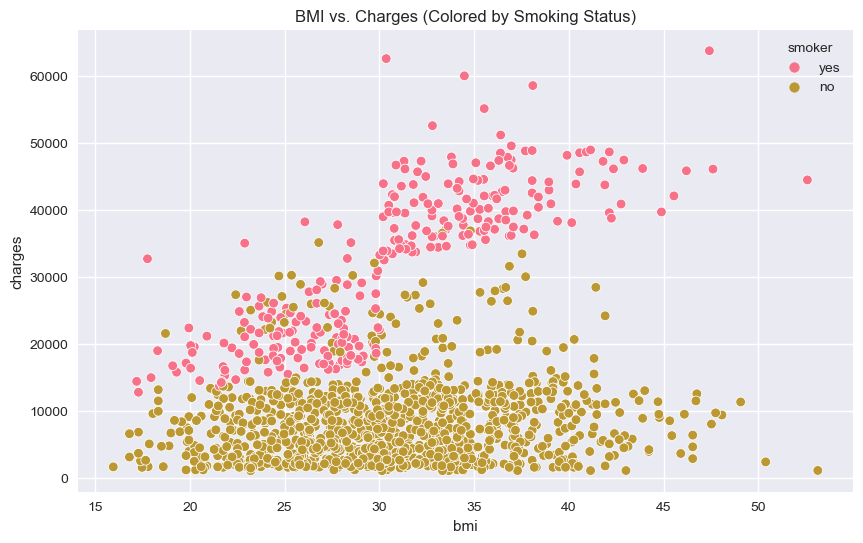

In [13]:
# BMI vs. Charges relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs. Charges (Colored by Smoking Status)')
plt.show()

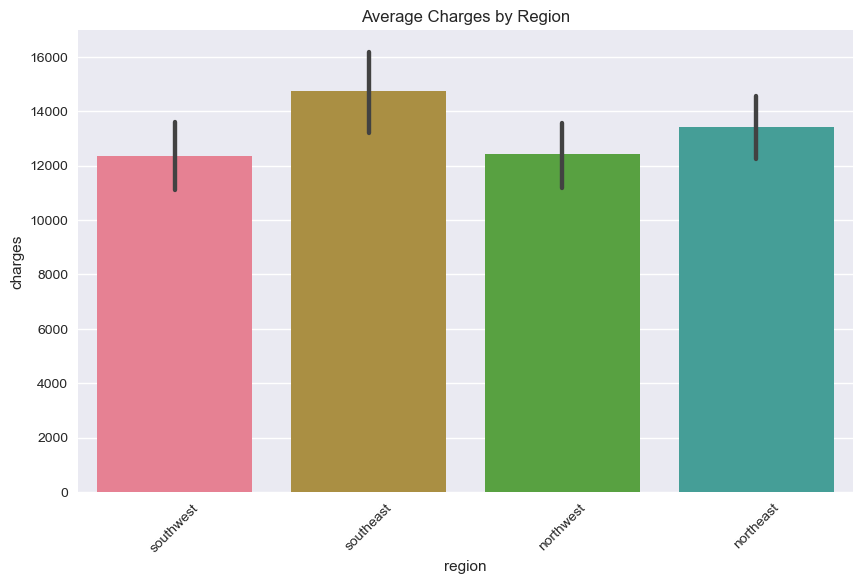

In [14]:
# Average charges by region
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region', y='charges')
plt.title('Average Charges by Region')
plt.xticks(rotation=45)
plt.show()

## 5. Feature Engineering and Data Preparation

Now let's prepare our data for modeling by encoding categorical variables and creating any necessary features.

In [15]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

In [16]:
# Convert categorical variables to numerical
df_processed['sex'] = pd.get_dummies(df_processed['sex'], drop_first=True)
df_processed['smoker'] = pd.get_dummies(df_processed['smoker'], drop_first=True)
df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True)

In [17]:
# Create interaction terms for important features
df_processed['bmi_age'] = df_processed['bmi'] * df_processed['age']
df_processed['bmi_smoker'] = df_processed['bmi'] * df_processed['smoker']

In [18]:
# Display the first few rows of processed data
print("First few rows of processed data:")
df_processed.head()

First few rows of processed data:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_age,bmi_smoker
0,19,False,27.900,0,True,16884.92400,False,False,True,530.100,27.9
1,18,True,33.770,1,False,1725.55230,False,True,False,607.860,0.0
2,28,True,33.000,3,False,4449.46200,False,True,False,924.000,0.0
3,33,True,22.705,0,False,21984.47061,True,False,False,749.265,0.0
4,32,True,28.880,0,False,3866.85520,True,False,False,924.160,0.0


## 6. Correlation Analysis

Let's examine the correlations between our features and the target variable.

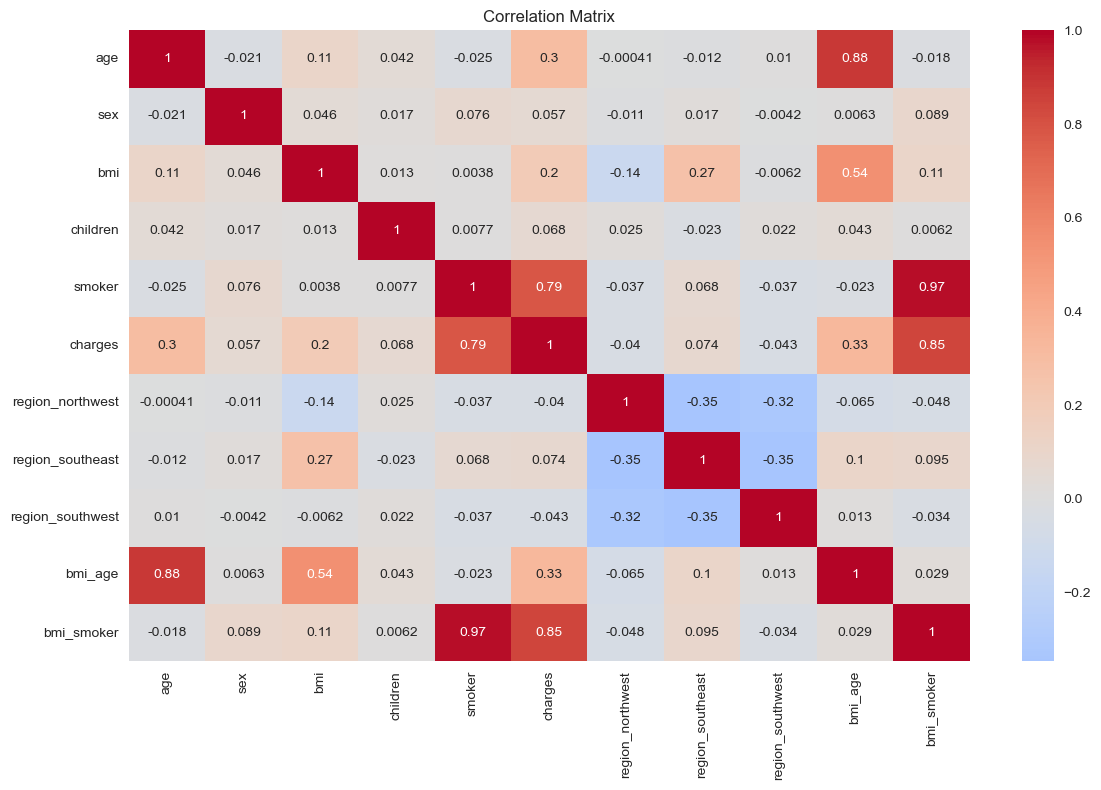

In [19]:
# Calculate correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [20]:
# Save processed data
df_processed.to_csv('../data/clean_data.csv', index=False)
print("Processed data has been saved to '../data/clean_data.csv'")

Processed data has been saved to '../data/clean_data.csv'
